In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
n = 150
p = 8*np.log(n)/n
q = 1*np.log(n)/n
k = 3

v = np.random.randint(1, k+1, size=n)
groups = v[:, np.newaxis] == v

In [36]:
print(v)

[2 3 3 2 2 2 1 2 3 1 2 3 2 1 1 3 3 2 3 1 3 2 1 1 2 1 3 3 2 1 1 3 2 1 1 2 2
 1 1 2 2 1 2 3 3 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 1 1 2 2 2 2 1 2 1 2 3 3 2 2
 1 3 2 3 1 3 2 1 3 2 1 3 3 2 2 2 3 2 3 3 1 2 3 1 3 2 2 2 2 3 2 1 3 1 2 3 2
 2 2 3 1 2 3 2 1 3 3 1 2 2 2 3 3 2 3 3 2 1 3 2 1 2 1 1 3 1 3 3 2 3 2 2 3 3
 2 3]


In [4]:
A = np.zeros((n,n))
A = p*groups + q*(~groups)
r = np.random.random((n,n))
r = (r+r.T)/2
A = np.where(A >= r, 1, 0)
np.fill_diagonal(A, 0)

In [5]:
D = np.diag(np.sum(A, axis=1))
L = D - A
e, V = np.linalg.eig(L)
s = np.argsort(e)
V = V[:, s]
e = e[s]

In [8]:
G = nx.from_numpy_array(A)

pos = dict()
for i in range(n):
    pos[i] = np.array((V[i, 1], V[i, 2]))

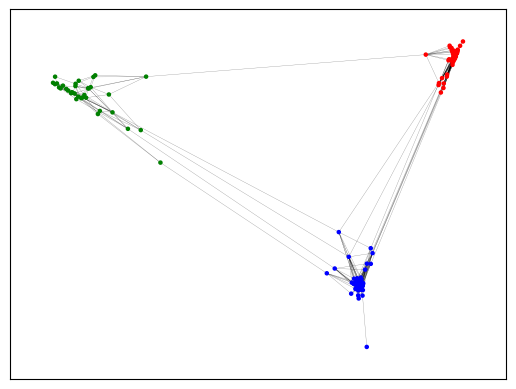

In [9]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['g', 'r', 'b'])

node_colors = v-2
nx.draw_networkx_edges(G, pos=pos, alpha=0.5, width=0.2);
nx.draw_networkx_nodes(G, pos=pos, node_size=5, node_color=node_colors, cmap=cmap);

زیرا ماتریس کواریانس، معیاری از میزان شباهت سیگنال ها به یکدیگر است

In [67]:
r = [11, 21, 26, 31]
T = [10, 1000]

a = 1/2/np.max(np.diag(D))

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

In [69]:
err = np.zeros((len(T), len(r)))
for i in range (3):
    for j, t in enumerate(T):
        for jj, rr in enumerate(r):
            X = np.random.normal(0, 1, size=(n,t))
            H = (1-L)^(rr-1)
            X = H @ X

            X_m = X - np.mean(X, axis=0)
            R = X_m @ X_m.T / (t-1)

            l, U = np.linalg.eig(R)
            s = np.argsort(l)
            U = U[:, s]
            l = l[s]

            result = KMeans(n_clusters=k, n_init='auto').fit(np.real(U[:, -3:]))
            labels = np.array(result.labels_)

            conf_mat = confusion_matrix(v, labels)
            row_ind, col_ind = linear_sum_assignment(-conf_mat)
            label_mapping = {col: row for row, col in zip(row_ind, col_ind)}
            mapped_labels = np.array([label_mapping[label] for label in labels])
            err[j, jj] = np.sum(mapped_labels != v)
err = err/3

In [70]:
print(f'T = {10}, r = {11}: average_error = {err[0,0]}')
print(f'T = {10}, r = {21}: average_error = {err[0,1]}')
print(f'T = {10}, r = {26}: average_error = {err[0,2]}')
print(f'T = {10}, r = {31}: average_error = {err[0,3]}')
print(f'T = {1000}, r = {11}: average_error = {err[1,0]}')
print(f'T = {1000}, r = {21}: average_error = {err[1,1]}')
print(f'T = {1000}, r = {11}: average_error = {err[1,2]}')
print(f'T = {1000}, r = {21}: average_error = {err[1,3]}')

T = 10, r = 11: average_error = 26.333333333333332
T = 10, r = 21: average_error = 31.666666666666668
T = 10, r = 26: average_error = 30.666666666666668
T = 10, r = 31: average_error = 29.666666666666668
T = 1000, r = 11: average_error = 5.0
T = 1000, r = 21: average_error = 30.0
T = 1000, r = 11: average_error = 32.333333333333336
T = 1000, r = 21: average_error = 23.0
